**Recuperação de Informação com base no Conteúdo Visual**

**Descrição de imagens**

Descritor representa a propriedade de uma imagem. O descritor deve ser invariante a rotação, escala, etc.

Exemplo de uma forma (muito simples) de se obter uma representação númerica sobre a imagem por meio de histograma de cor.

In [1]:
import numpy as np
import cv2
#from google.colab.patches import cv2_imshow
def cv2_imshow(img):
    cv2.imshow('', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [9]:
%%time
img_avatar = cv2.imread('avatar.png',0)

cv2_imshow(img_avatar)

hist, bins = np.histogram(img_avatar.ravel(),256,[0,256])

print(bins)
print(hist)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

**Plotting Histograms**

In [7]:
from matplotlib import pyplot as plt

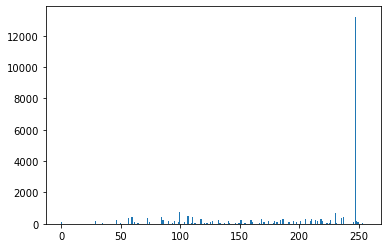

In [11]:
plt.hist(img_avatar.ravel(),256,[0,256]); plt.show()

Histograma de cor da imagem nos três canais RGB

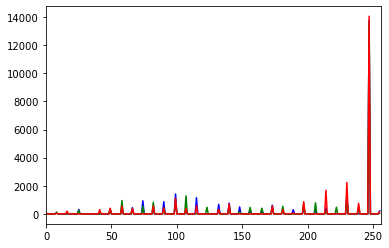

In [12]:
img_avatar_bgr = cv2.imread('avatar.png')

cv2_imshow(img_avatar_bgr)

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_avatar_bgr],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])

plt.show()

**Feature Detection and Description**

**Features Locais**

Features locais: Padrão que se difere da vizinhança local. 
Pontos de interesse: cantos (corners), regiões, etc..

**BRIEF (Binary Robust Independent Elementary Features)**

In [2]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [30]:
img_avatar = cv2.imread('avatar.png')    
gray = cv2.cvtColor(img_avatar,cv2.COLOR_BGR2GRAY)

**ORB (Oriented FAST and Rotated BRIEF)**

In [31]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(gray,None)

print(np.shape(des1))
print(des1)

134  70 250 241  23 114 218 187 158  85  31  95]
 [ 55 122 227  69  54  18  79 208  85 232 214 231  67  12 183  44 126 236
   29 239 205 245  45 168 178  78 173 134 175 191 112 117]
 [230  48 246 214 111  92 188  65 249 222 177 191  76 220 127  59 238 181
  247 163 228 103 178 192  23 123 218 171  71  44 119 215]
 [174 112 242 242 111  93 184  65 155 254 241  63 140 156 119  11 238 189
  247 147 228 119 178 194  87  89 219 175 199  60  55 215]
 [142 120 146 185 109 165 184  88  31  59  81  50 157 223  97  72 255  57
  191 145   2  86  74 210 213 215 187 238 150   9  33 131]
 [107  62 240  82 111 125 184  70 219 255  60  61  44 188  95 186 143 123
  247  21 134 102 182 224  87  95  88 171 199  93  95 223]
 [ 60  72 238 252 100  62  74  80  85 138 247   0 123 201  53  88 216 236
   63 106 136 247  97 138 211 255 227 128  71 171 112 129]
 [168  72 126 252 108 158  90 112 197   8 246   0 123 201 177 105 204 232
   63  74 200 167  50 173 211 251 226 136  82 185 112 169]
 [219  91 107 173   

Matching de features locais entre duas imagens

In [3]:
import imutils

In [33]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [34]:
img1 = cv2.imread('avatar.png',0)             
img2 = cv2.imread('avatar.png',0)  

# rotate image 180° 
rotated = imutils.rotate(img2, 180)
img2 = rotated

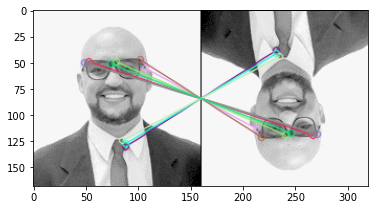

(<matplotlib.image.AxesImage at 0x203b350ed30>, None)

In [35]:
# find the keypoints and descriptors with SIFT
kp1, desc1 = orb.detectAndCompute(img1,None)
kp2, desc2 = orb.detectAndCompute(img2,None)

# Match descriptors.
matches = bf.match(desc1,desc2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=2)

plt.imshow(img3),plt.show()

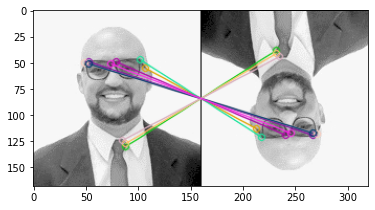

(<matplotlib.image.AxesImage at 0x203b255a280>, None)

In [37]:
# rotate image 180° 
rotated = imutils.rotate(img_avatar, 180)
img_avatar_rotated = rotated

# find the keypoints and descriptors with SIFT
kp1, desc1 = orb.detectAndCompute(img_avatar,None)
kp2, desc2 = orb.detectAndCompute(img_avatar_rotated,None)

# Match descriptors.
matches = bf.match(desc1,desc2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img_avatar_matches = cv2.drawMatches(img_avatar,kp1,img_avatar_rotated,kp2,matches[:10],None,flags=2)

plt.imshow(img_avatar_matches),plt.show()

**Busca de vídeo com base em conteúdo visual**

**Lendo um vídeo em OpenCV**

Abre e extrai keyframes do vídeo salvando em disco

In [2]:
from os import listdir
from os.path import isfile, join
import os
import os.path
import sys
import pickle

In [3]:
frames_dir = "frames/"

features_dir = "features/"

cluster_dir = "cluster/"

bow_dir = "bow/"

if not os.path.exists(frames_dir):
    os.makedirs(frames_dir)  

if not os.path.exists(features_dir):
    os.makedirs(features_dir)  
  
if not os.path.exists(cluster_dir):
    os.makedirs(cluster_dir)  

if not os.path.exists(bow_dir):
    os.makedirs(bow_dir)

In [4]:
# video file
video = "teste2.mp4"

# create VideoCapture object and read from video file
cap = cv2.VideoCapture(video)

# frames per second
video_frames = 30

# frame id
id_frame = 0

ret = True
while ret:
    # capture frame by frame
    ret, frame = cap.read()

    # video length
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    if (id_frame % video_frames) == 0 and ret:

        print("Proccessing frame " + str(id_frame) + " of " + str(length))

        frame_path = os.path.join(frames_dir, str(id_frame) + ".png")

        # salva a imagem (frame) no disco
        cv2.imwrite(frame_path, frame)
    
    id_frame += 1
  
print("Done")

Proccessing frame 0 of 605
Proccessing frame 30 of 605
Proccessing frame 60 of 605
Proccessing frame 90 of 605
Proccessing frame 120 of 605
Proccessing frame 150 of 605
Proccessing frame 180 of 605
Proccessing frame 210 of 605
Proccessing frame 240 of 605
Proccessing frame 270 of 605
Proccessing frame 300 of 605
Proccessing frame 330 of 605
Proccessing frame 360 of 605
Proccessing frame 390 of 605
Proccessing frame 420 of 605
Proccessing frame 450 of 605
Proccessing frame 480 of 605
Proccessing frame 510 of 605
Proccessing frame 540 of 605
Proccessing frame 570 of 605
Proccessing frame 600 of 605
Done


In [10]:
frame = cv2.imread('frames/30.png')
cv2_imshow(frame)

Extraindo descritores do frames do vídeo usando BRIEF Descriptor

In [5]:
# leitura das imagens do diretório
onlyfiles = []
if os.path.exists(frames_dir):
    onlyfiles = [f for f in listdir(frames_dir) if isfile(join(frames_dir, f))]
    
    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:

        print(file)
    
        img_path = join(frames_dir, file)

        img = cv2.imread(img_path)

        # opcional: redimensiona a imagem
        #img = cv2.resize(img, (480, 270), interpolation=cv2.INTER_CUBIC)
        
        # Initiate STAR detector
        star = cv2.xfeatures2d.StarDetector_create()

        # Initiate BRIEF extractor
        brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

        # find the keypoints with STAR
        kp = star.detect(img,None)

        # compute the descriptors with BRIEF
        kp, feat = brief.compute(img, kp)        

        print(len(kp))
        print(np.shape(feat))
        # print(feat)

        feat_path = join(features_dir, file)

        # store the data as binary data stream
        with open(feat_path + ".brief", "wb") as f:            
            pickle.dump(feat.tolist(), f)        

        # f = open(feat_path + ".brief.txt", "w")
        # f.write(str(feat.tolist()))
        # f.close()

0.png
813
(813, 32)
120.png
1286
(1286, 32)
150.png
1366
(1366, 32)
180.png
1092
(1092, 32)
210.png
1429
(1429, 32)
240.png
1769
(1769, 32)
270.png
983
(983, 32)
30.png
607
(607, 32)
300.png
1120
(1120, 32)
330.png
1135
(1135, 32)
360.png
1366
(1366, 32)
390.png
456
(456, 32)
420.png
1010
(1010, 32)
450.png
1371
(1371, 32)
480.png
1298
(1298, 32)
510.png
1236
(1236, 32)
540.png
1302
(1302, 32)
570.png
1327
(1327, 32)
60.png
833
(833, 32)
600.png
1603
(1603, 32)
90.png
985
(985, 32)


**Criação do vocabulário visual**

**1. Clusterização**

In [6]:
from sklearn.cluster import KMeans
import time

In [7]:
cluster_file = cluster_dir + "cluster.cluster"

In [8]:
# número de clusters
k = 64

# núimeros de dimensões das features
dim = 32

In [9]:
# salva o vocabulário criado (centroids) em disco
def saveCentroids (kmeans, output_file, dim):
    i = 0
    desc = ""

    for k in np.nditer(kmeans.cluster_centers_):        
        a = np.array(k).round(2)
        desc += str(a) + " "
        i += 1        

        if (i % dim) == 0:
            desc += "\n" 

    output_file.write(desc)

In [10]:
listOfFeat = []

# leitura das imagens do diretório
onlyfiles = []
if os.path.exists(features_dir):
    onlyfiles = [f for f in listdir(features_dir) if isfile(join(features_dir, f))]
    
    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:
        # print(file)
    
        feat_path = join(features_dir, file)

        with open(feat_path, 'rb') as f:
            # read the data as binary data stream
            feat = pickle.load(f)

        # print(feat)

        for item in feat:
            listOfFeat.append(item)

output_file = open(cluster_file, 'w')

# print( np.asarray(listOfFeat) )
print( np.asarray(listOfFeat).shape )
# output_file.write(np.asarray(listOfFeat[0]))
    
t1 = time.time()  
kmeans = KMeans(n_clusters=k, random_state=0).fit(np.asarray(listOfFeat))
t2 = time.time()
tf = t2 - t1

print(tf)

saveCentroids (kmeans, output_file, dim)  
output_file.close()

(24387, 32)
27.81748390197754


**2. Bag of Visual Word**

In [11]:
%%time
# leitura dos centroids do arquivo
centroids = np.loadtxt(cluster_file)

# obtem o número de centroids (palavras visuais)
clusters = centroids.shape[0]

# leitura das imagens do diretório
onlyfiles = []
if os.path.exists(features_dir):
    onlyfiles = [f for f in listdir(features_dir) if isfile(join(features_dir, f))]

    bowOfImages = []    
    
    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:
    
        feat_path = join(features_dir, file)

        with open(feat_path, 'rb') as f:
            # read the data as binary data stream
            feat = pickle.load(f)        

        # inicializa o BoW da imagem com zero para cada dimensão
        bow = [0] * clusters

        # procedimento força bruta para cálculo de distância (euclidean distance)
        for item in feat:
            result = sys.float_info.max
            centroid_id = 0

            for id, c in enumerate(centroids):
               # Euclidean Distance 
               dist = np.sqrt(np.sum(np.square(np.subtract(item, c))))
               if dist < result:
                  result = dist
                  centroid_id = id

            bow[centroid_id] += 1                     
        
        bow_path = join(bow_dir, file)

        with open(bow_path + ".bow", 'w') as f:
            for item in bow:
                f.write("%s " % item)

print("Done")

Done
Wall time: 2min 16s


**Busca**

Utilizando um arquivo de BoW de uma imagem do próprio vídeo

In [12]:
%%time
# leitura das imagens do diretório

q = np.loadtxt(bow_dir + "450.png.brief.bow")

onlyfiles = []
if os.path.exists(bow_dir):
    onlyfiles = [f for f in listdir(bow_dir) if isfile(join(bow_dir, f))]

    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:

        feat_path = join(bow_dir, file)

        item = np.loadtxt(feat_path)

        # print(item)
        # print(item.shape)

        dist = np.sqrt(np.sum(np.square(np.subtract(item, q))))

        print(str(file) + ": " + str(dist))

0.png.brief.bow: 108.02777420645118
120.png.brief.bow: 56.595052787324086
150.png.brief.bow: 61.065538563088104
180.png.brief.bow: 67.32755750805164
210.png.brief.bow: 75.03332592921628
240.png.brief.bow: 89.89994438263018
270.png.brief.bow: 79.42291860665912
30.png.brief.bow: 115.29093633065871
300.png.brief.bow: 69.0869017976635
330.png.brief.bow: 64.97691897897283
360.png.brief.bow: 63.111013301958636
390.png.brief.bow: 129.10848151845022
420.png.brief.bow: 71.35124385741288
450.png.brief.bow: 0.0
480.png.brief.bow: 51.234753829797995
510.png.brief.bow: 49.040799340956916
540.png.brief.bow: 57.645468165329355
570.png.brief.bow: 64.76109943476871
60.png.brief.bow: 86.92525524840292
600.png.brief.bow: 70.05711955254797
90.png.brief.bow: 70.80960386840192
Wall time: 71 ms


In [13]:
frame = cv2.imread('search/beluga.jpg')
cv2_imshow(frame)

error: OpenCV(4.5.1) ..\modules\highgui\src\window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


Altere a quantidade de clsuter para k = 64 e repita o procedimento acima, compare os resultados de cálculo de distância. O que mudou em relação às distâncias calculadas?

**Utilizando uma nova imagem qualquer**

Calculando features locais da imagem de consulta

In [0]:
search_dir = "search/"
q = search_dir + "beluga.jpg"
q_feature = q + ".brief"
q_bow = q_feature + ".bow"

In [0]:
img_search = cv2.imread(q)

# Initiate STAR detector
star = cv2.xfeatures2d.StarDetector_create()

# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# find the keypoints with STAR
kp = star.detect(img_search,None)

# compute the descriptors with BRIEF
kp, feat = brief.compute(img_search, kp)        

print(len(kp))
print(np.shape(feat))
# print(feat)

# store the data as binary data stream
with open(q_feature, "wb") as f:            
  pickle.dump(feat.tolist(), f)        

Calculando BoW da imagem de consulta (observe que o mesmo vocabulário visual calculado anteriormente é utilizado)

In [0]:
# leitura dos centroids do arquivo
centroids = np.loadtxt(cluster_file)

# obtem o número de centroids (palavras visuais)
clusters = centroids.shape[0]

with open(q_feature, 'rb') as f:
    # read the data as binary data stream
    feat = pickle.load(f)        

    # inicializa o BoW da imagem com zero para cada dimensão
    bow = [0] * clusters

    # procedimento força bruta para cálculo de distância (euclidean distance)
    for item in feat:
        result = sys.float_info.max
        centroid_id = 0

        for id, c in enumerate(centroids):
            dist = np.sqrt(np.sum(np.square(np.subtract(item, c))))
            if dist < result:
              result = dist
              centroid_id = id

        bow[centroid_id] += 1                     

    with open(q_bow, 'w') as f:
        for item in bow:
            f.write("%s " % item)

print("Done")

Realizando a consulta

In [0]:
# leitura das imagens do diretório

q = np.loadtxt(q_bow)

onlyfiles = []
if os.path.exists(bow_dir):
    onlyfiles = [f for f in listdir(bow_dir) if isfile(join(bow_dir, f))]

    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:

        feat_path = join(bow_dir, file)

        item = np.loadtxt(feat_path)

        # print(item)
        # print(item.shape)

        dist = np.sqrt(np.sum(np.square(np.subtract(item, q))))

        print(str(file) + ": " + str(dist))

In [0]:
frame = cv2.imread('frames/450.png')
cv2_imshow(frame)